<h1 style = "color : #3D737D; text-align : center;"><em>City Hospital</em> - Data Preprocessing & Exploratory Analysis</h1>
<br>
<p style = "font-size : 12px; text-align: center;"><b>NOVA IMS</b></p>
<p style = "font-size : 10px; text-align: center;">Data Preprocessing and Visualization</p>
<p style = "font-size : 10px; text-align: center;">GROUP 8: Diogo Gonçalves, João Marques, Juan Mendes & Gustavo Franco</p>
<br>

<h3  style = "color : #3D737D;"> Imports</h3>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [20]:
plt.style.use('ggplot')

<hr style = "border: 3px solid #3D737D;">
<h2  style = "color : #3D737D;text-align : center;"> Part A - Data Understanding & Cleaning</h2>

<h3 style = "color : #3D737D;">Dataset Reading </h3>
<p style = "font-size : 15px;">Reading of dataset from <code>Project Data.xlsx</code> file</p>
<p>The dataset is in a <code>.xlsx</code> file, and uses <code>|</code> as a separator. The first row of the file is also blank, so we read it using <code>skiprows = 1</code>. </p>

In [21]:
project_data = pd.read_excel('Project Data.xlsx')

In [22]:
project_data.head()

,Patient ID,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
0,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-02-22,Endocrinology,110,2,38839.0,293.014042,0.0
1,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-01-21,Emergency,76,4,52219.0,287.208982,0.0
2,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-06-13,Neurology,17,5,41491.0,241.254507,0.0
3,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-24,Emergency,15,3,34944.0,221.177483,0.0
4,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-19,Neurology,99,1,39248.0,219.743794,0.0


In [23]:
project_data.shape

(10008, 16)

In [24]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Patient ID                 10008 non-null  int64         
 1   Age                        9952 non-null   float64       
 2   Gender                     10008 non-null  object        
 3   City of Residence          10008 non-null  object        
 4   Profession                 10008 non-null  object        
 5   Insurance Provider         8098 non-null   object        
 6   Family History             8015 non-null   object        
 7   Education Level            9979 non-null   object        
 8   Marital Status             10008 non-null  object        
 9   Visit Date                 10008 non-null  datetime64[ns]
 10  Department                 10008 non-null  object        
 11  Consultation Duration      10008 non-null  int64         
 12  Sati

<h3 style = "color : #3D737D;">Variable Analysis</h3>
<p style = "font-size : 15px;">Analysis of the skewness and outliers of the variables of <code>Project Data.xlsx</code> file without missing values.</p>

In [25]:
numerical_cols = [
    'Age', 
    'Consultation Duration', 
    'Satisfaction Level',
    'Approximate Annual Income', 
    'Consultation Price', 
    'Insurance Coverage'
]

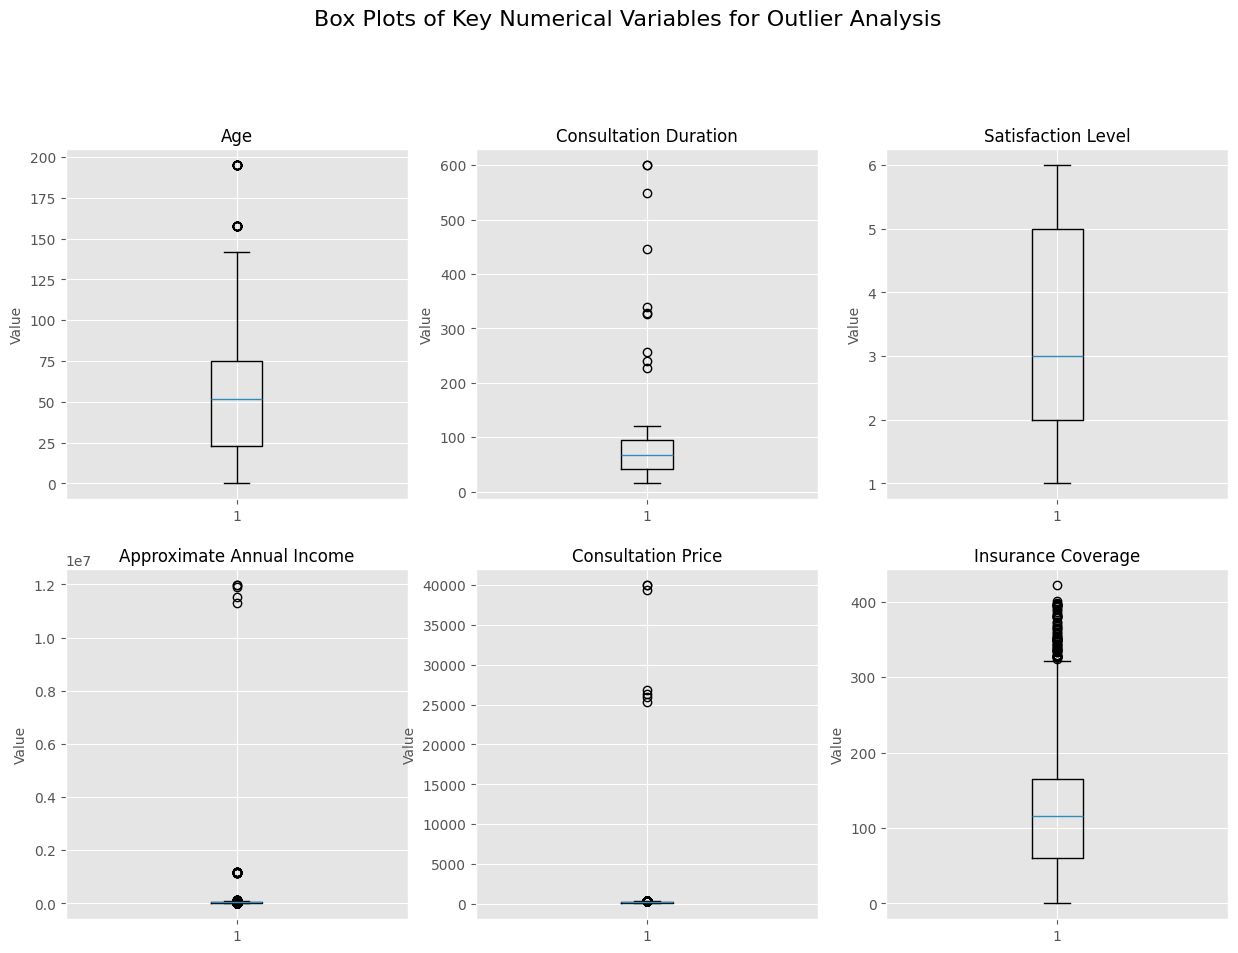

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 
axes = axes.flatten()

fig.suptitle('Box Plots of Key Numerical Variables for Outlier Analysis', 
             fontsize=16, y=1.02)

for i, col in enumerate(numerical_cols):
    if col in project_data.columns:
        # Crucial Concept: .dropna() ensures the boxplot only uses non-missing values
        data_to_plot = project_data[col].dropna()
        
        if not data_to_plot.empty:
            axes[i].boxplot(data_to_plot)
            axes[i].set_title(col, fontsize=12)
            axes[i].set_ylabel('Value', fontsize=10)
        else:
            axes[i].set_title(f"{col}\n(No Data Available)", fontsize=12)